## Fetching the CDC Diabetes Dataset

In [1]:
from ucimlrepo import fetch_ucirepo 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

In [2]:
X = cdc_diabetes_health_indicators.data.features 
Y = cdc_diabetes_health_indicators.data.targets

In [3]:
import pandas as pd
Df = pd.concat([X, Y], axis=1)

In [4]:
Df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


## Exploratory Data Analysis

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
print(Df.columns)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')


In [38]:
print(cdc_diabetes_health_indicators.variables)

                    name     role     type      demographic   
0                     ID       ID  Integer             None  \
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

In [39]:
print(cdc_diabetes_health_indicators.variables.description[18])

Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes


In [40]:
# Checking missing values
Df.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [41]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [42]:
Df.shape

(253680, 22)

#### An initial look tells us that most of the features are in binary form with some integer value features as well, so there is no need to convert any feature to numerical format. There seems to be no discrepancies in the data, there are no missing values, and no unusable features that we need to remove.

#### We have a a total of 253680 datapoints with 21 features and binary label data in the 'Diabetes_binary' column.

### 1. Univariate Analysis -  Analyze data over a single variable/column from a dataset

Education
6    107325
5     69910
4     62750
3      9478
2      4043
1       174
Name: count, dtype: int64


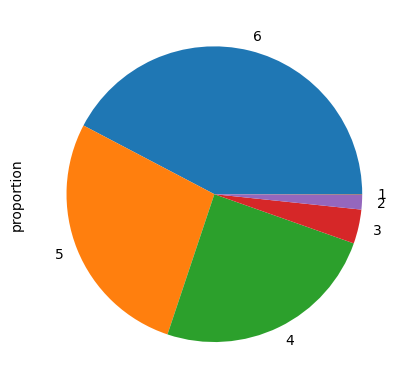

In [43]:
# calculate the percentage of each education category.
edu = Df.Education.value_counts(normalize=False)
print(edu)

# plot the pie chart of education categories
Df.Education.value_counts(normalize=True).plot.pie()
plt.show()

### 2. Bivariate Analysis - Analyze data by taking two variables/columns into consideration from a dataset.

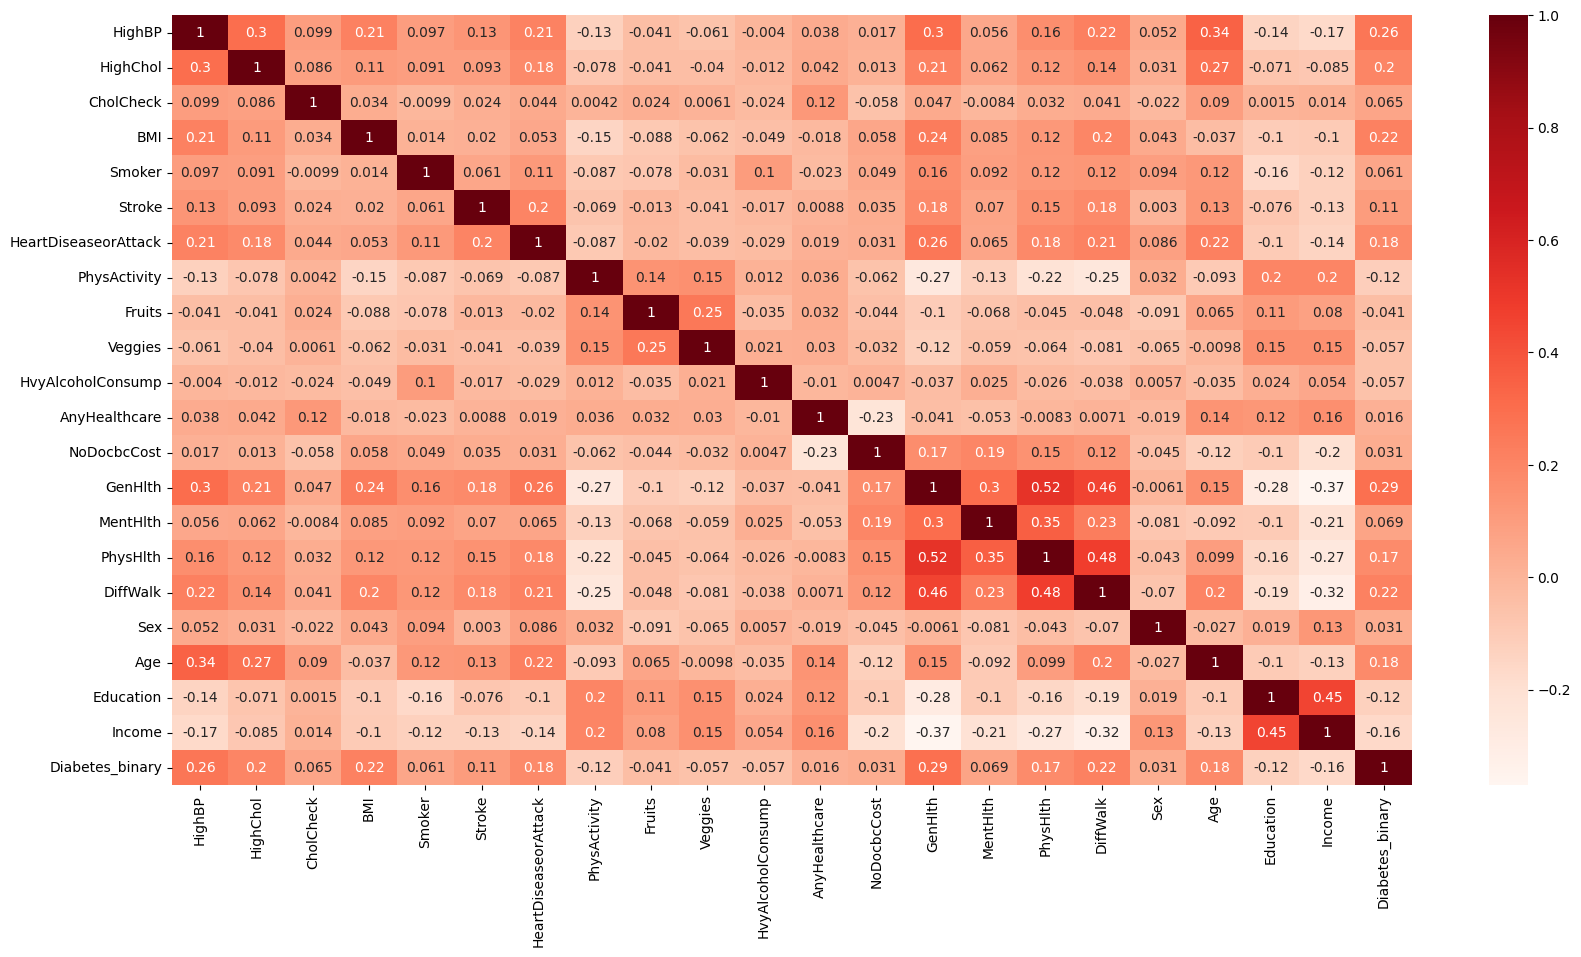

In [44]:
# Correlation matrix between the features.

cor=Df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cor, annot=True ,cmap='Reds')
plt.show()

#### There is no high correlation between the variables. Hence no need to remove features based on the correlation matrix

#### As expected there is some correlation between physical health, general health and difficulty walking. There is also some correlation between income and education level.

## Logistic Regression

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
# ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']

X = Df.drop(['Diabetes_binary'], axis =1)
Y = Df['Diabetes_binary']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
logReg = LogisticRegression(max_iter=1000)
logReg.fit(X_train, Y_train)

In [ ]:
Y_pred=logReg.predict(X_test)
Y_pred

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

In [ ]:
print(classification_report(Y_test, Y_pred))

In [ ]:
class_names=[0,1] # name  of classes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Support Vector Machine

In [6]:
from sklearn.svm import SVC

In [ ]:
model = SVC()
model.fit(X_train, Y_train)

## Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dTClassifier = DecisionTreeClassifier()

In [12]:
dTClassifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [14]:
Y_pred = dTClassifier.predict(X_test)

In [15]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
df

,Actual,Predicted
219620,0,0
132821,0,0
151862,0,0
139717,0,0
239235,0,0
...,...,...
58678,0,0
203840,1,0
206241,0,0
53188,0,0


In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.20364238410596028
Mean Squared Error: 0.20364238410596028
Root Mean Squared Error: 0.45126753052480995


In [27]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(60,50))
# plt.title("Decision Tree")
# plot_tree(dTClassifier, feature_names=X_train.columns,  filled=True, rounded = True,fontsize= 16)
# plt.show()

## Multi Layer Perceptron Classifier

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [28]:
mlpClass = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=1000, random_state=42, verbose=True)
mlpClass.fit(X_train, Y_train)

Iteration 1, loss = 0.34835138
Iteration 2, loss = 0.32727508
Iteration 3, loss = 0.32455250
Iteration 4, loss = 0.32288801
Iteration 5, loss = 0.32161706
Iteration 6, loss = 0.32073572
Iteration 7, loss = 0.31934112
Iteration 8, loss = 0.31883495
Iteration 9, loss = 0.31805501
Iteration 10, loss = 0.31768964
Iteration 11, loss = 0.31699177
Iteration 12, loss = 0.31671322
Iteration 13, loss = 0.31646510
Iteration 14, loss = 0.31589328
Iteration 15, loss = 0.31572641
Iteration 16, loss = 0.31553701
Iteration 17, loss = 0.31495564
Iteration 18, loss = 0.31504812
Iteration 19, loss = 0.31444752
Iteration 20, loss = 0.31456024
Iteration 21, loss = 0.31425886
Iteration 22, loss = 0.31412247
Iteration 23, loss = 0.31381083
Iteration 24, loss = 0.31392271
Iteration 25, loss = 0.31398102
Iteration 26, loss = 0.31349105
Iteration 27, loss = 0.31314673
Iteration 28, loss = 0.31302189
Iteration 29, loss = 0.31305913
Iteration 30, loss = 0.31311806
Iteration 31, loss = 0.31307584
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42,
              verbose=True)

In [31]:
Y_pred = mlpClass.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [34]:
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93     65605
           1       0.53      0.20      0.29     10499

    accuracy                           0.87     76104
   macro avg       0.71      0.58      0.61     76104
weighted avg       0.83      0.87      0.84     76104

